In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pickle
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import pickle 

import seaborn as sns
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

import os
os.chdir('/Users/alexandrejacqueline/documents/scriptopc/P6')

In [2]:
notes = pd.read_csv('notes.csv')

# ACP

La fonction utilisée pour calculer les corrélations se trouve dans le fichier functions.py joint à ce notebook. Cette dernière permet d'avoir les corrélations exactes, contrairement à la méthode .components_ .components_de l'ACP.

In [3]:
from functions import *

In [4]:
test = notes.drop(columns=['is_genuine'], axis=1)
# True/False to 0/1
notes['is_genuine'] = notes['is_genuine'].astype(int)

#0 = False
#1 = True

In [5]:
# True/False to 0/1
notes['is_genuine'] = notes['is_genuine'].astype(int)

# Initialisation de l'ACP

In [6]:
# choix du nombre de composantes à calculer
n_comp = 6

# préparation des données pour l'ACP
X = test.values
names = test.index
features = test.columns

#transformation–centrage-réduction
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(svd_solver='full', n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6, svd_solver='full')

# Représentation de la variance expliquée

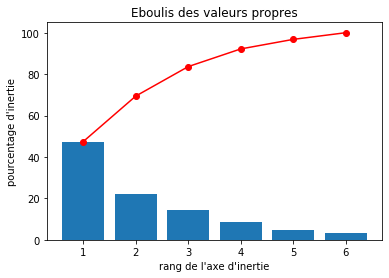

[0.47447921 0.21957106 0.14234524 0.08526295 0.04612822 0.03221331]


In [7]:
# Eboulis des valeurs propres
display_scree_plot(pca)

# Proportion de variance expliquée
print(pca.explained_variance_ratio_)
#plt.savefig("14_eboulis.png")

In [8]:
#Aide à la décision dans le choix du nombre de composantes à etudier 

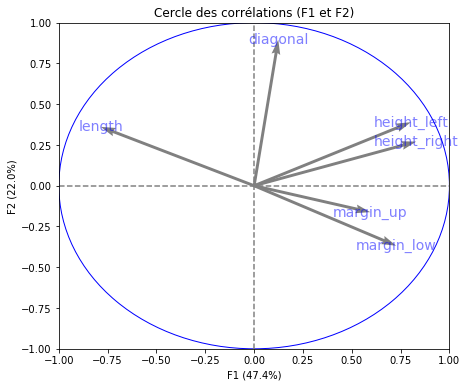

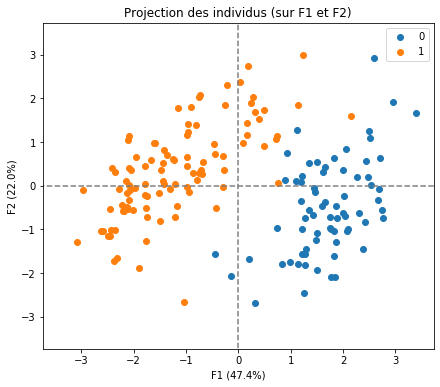

In [9]:
# cercle des corrélations
pcs = get_correlation(pca, X_scaled)
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))


#Axes factorielles 
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=notes['is_genuine'])

plt.show()
#plt.savefig("15_ACP.png")

F1 : Longueur du billet VS hauteur / marge

F2 : Longueur de la diagonale

Je n'ai conservé que cette projection car elle est de loin la plus pertinente. On voit que l'axe de la première composante est celui qui sépare principalement les vrais billets des faux billets. 
De plus, F1 explique 47% de l'inertie. 
Le second axe explique 22% de l'inertie et participe à la séparation des vrais billets et des faux billets. On voit qu'une diagonale sépare clairement les vrais et les faux billets. F1 permet dans de nombreux cas de déterminer s'il s'agit d'un vrai billet ou non. Pour les valeurs proches de zéro, alors c'est la valeur de F2 qui va permettre de discriminer.

# Contribution des individus dans l'inertie totale

In [10]:
di = np.sum(X_scaled**2,axis=1)

ctr_indiv_inertie = pd.DataFrame(di, index=notes.index, columns=['d_i'])

ctr_indiv_inertie.sort_values(by='d_i', ascending=False)

,d_i
166,20.625650
0,18.410598
4,18.039567
122,16.790944
39,15.052608
112,14.422407
151,13.637281
49,12.917538
160,12.831169
158,12.724639


# Qualité de représentation des individus - COS2

 Pour consolider les résultats, on peut éventuellement calculer les COS2 pour indiquer la qualité de la représentation d’une variable c.-à-d. le carré de la corrélation. L’intérêt est de disposer d’un indicateur non-signé qui s’additionne d’un facteur à l’autre.

In [12]:
cos2 = X_projected**2

for j in range(n_comp):
    cos2[:,j] = cos2[:,j]/di
    
cos2_indiv = pd.DataFrame(cos2, index=notes.index,
                          columns=['COS2_'+str(i + 1) for i in range(n_comp)])

print("\nQualité de la représentation des individus (pourcentage) :\n",cos2_indiv*100)


Qualité de la représentation des individus (pourcentage) :
         COS2_1     COS2_2     COS2_3     COS2_4     COS2_5     COS2_6
0    25.192880  13.899985  17.354028  32.164914   2.659150   8.729042
1    81.800175   5.082225   5.406524   2.180326   0.083533   5.447217
2    78.486221   0.046644  14.865204   2.832043   3.639295   0.130593
3    88.285555   0.165214   5.878888   5.616852   0.023029   0.030461
4    32.014486   0.941730  61.083108   3.883908   0.978556   1.098213
5    13.244692  77.198484   7.879189   1.311454   0.358139   0.008043
6    53.854032  16.413674   0.365234  11.507593  14.299482   3.559986
7    73.681304  11.577888  12.231570   1.375921   1.132999   0.000318
8    50.569460   0.869155  22.060321   0.068543  25.849451   0.583070
9    22.296512  47.683644  20.936243   0.540278   2.718551   5.824772
10    3.550046  43.642849  33.432115  15.291801   1.936160   2.147028
11   74.230012   2.950150  11.277060   0.040920  10.289157   1.212702
12    0.460210  36.694318   8

# K_means

In [13]:
#K-means sur les données centrées et réduites
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import decomposition
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(notes)

#index triés des groupes
idk = np.argsort(kmeans.labels_)

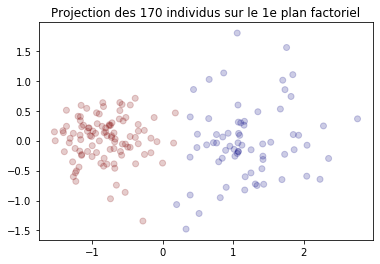

In [14]:
k=test
# Nombre de clusters souhaités
n_clust = 2
# préparation des données pour le clustering
X = k.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité

# X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)
#plt.savefig("16_KMean.png")

In [15]:
notes['Clusters_KM'] = kmeans.labels_

# Silhouette metric method

[0.58272343 0.46153395 0.23389978 0.25258644 0.23691926 0.24635307
 0.22606845 0.23384148 0.21090756]


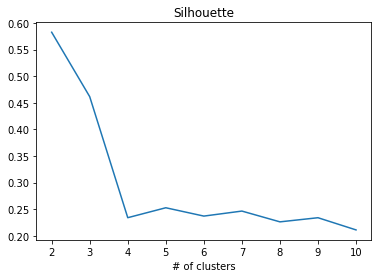

In [16]:
#analyse du kmean avec la fonctions metric 
#https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

#lib pour evaluation des partitions 
from sklearn import metrics

#utilisation de la métrique "silhouette"
#Faire varier le nombre de cluster de 2 à 10
res = np.arange(9, dtype='double')
for k in np.arange(9):
    km= cluster.KMeans(n_clusters=k+2)
    km.fit(notes)
    res[k]=metrics.silhouette_score(notes,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title('Silhouette')
plt.xlabel('# of clusters')
plt.plot(np.arange(2,11,1),res)
plt.show()
#plt.savefig("’.png")

# Performance de notre modèle KMean 

In [18]:
test_clusters = pd.Series(clusters)
test_genuine = notes['is_genuine'].copy()
df_test = pd.concat([test_clusters, test_genuine], axis=1)
df_test['result'] = df_test[0] == df_test['is_genuine']

In [19]:
len_test = len(df_test)
len_true = len(df_test[df_test['result'] == True])
len_ratio = len_true / len_test

print(f"Success du K.Mean par rapport à la variable is_genuine: {len_true} ({len_ratio:.2%})")

Success du K.Mean par rapport à la variable is_genuine: 167 (98.24%)


Nous pouvons représenter par un tableau croisé de nos variable is_genuine par rapport à notre k-mean. 

In [20]:
pd.crosstab(clusters,test_genuine)


is_genuine,0,1
row_0,,
0,68,1
1,2,99


# Sauvegarde du dataset

In [21]:
with open('mypicklefile_P6.pkl', 'wb') as f1:
    my_pickler = pickle.Pickler(f1)
    my_pickler.dump(notes)